# Pymaceuticals Inc.
---

### Analysis

- From our final analysis of the regression and correlation, there is a very strong correlation between mouse weight and average tumor volume among mice treated with the Capomulin regimen.

- In terms of final tumor volume, Capomulin and Ramicane had much lower volumes at the end of treatment than mice who went through the Infubinol and Ceftamin treatments.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_mousestudy = pd.merge(study_results, mouse_metadata, how = "left")

# Display the data table for preview
complete_mousestudy

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
len(complete_mousestudy["Mouse ID"].unique())

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_IDs = complete_mousestudy.loc[complete_mousestudy.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dupe_IDs

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dupes = complete_mousestudy.loc[complete_mousestudy["Mouse ID"] == "g989", :]
all_dupes

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#df = df.loc[~df['C'].isin(value_to_remove)]

new_df = complete_mousestudy.loc[~complete_mousestudy['Mouse ID'].isin(dupe_IDs)]

In [7]:
# Checking the number of mice in the clean DataFrame.
len(new_df["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumorV = new_df['Tumor Volume (mm3)'].groupby(new_df['Drug Regimen'])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumorV_df = pd.DataFrame({
        'Mean Tumor Volume': tumorV.mean(),
        'Median Tumor Volume': tumorV.median(),
        'Tumor Volume Variance': tumorV.var(),
        'Tumor Volume Std Dev': tumorV.std(),
        'Tumor Volume SEM': tumorV.sem()
})
tumorV_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
new_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, '# of Mice per Treatment')

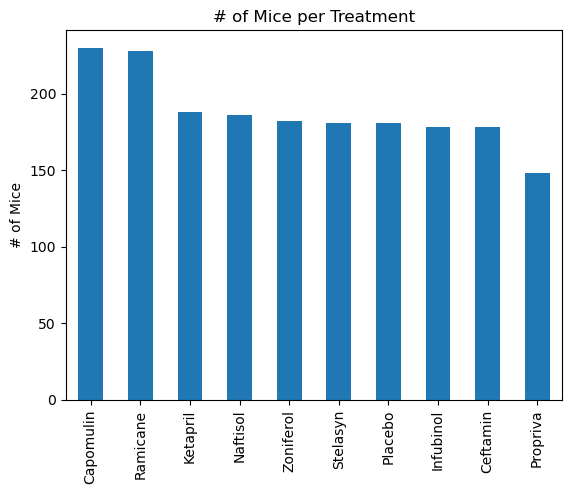

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_time = new_df['Drug Regimen'].value_counts()
pandas_plot = mouse_time.plot.bar()
plt.ylabel("# of Mice")
plt.title("# of Mice per Treatment")

<function matplotlib.pyplot.show(close=None, block=None)>

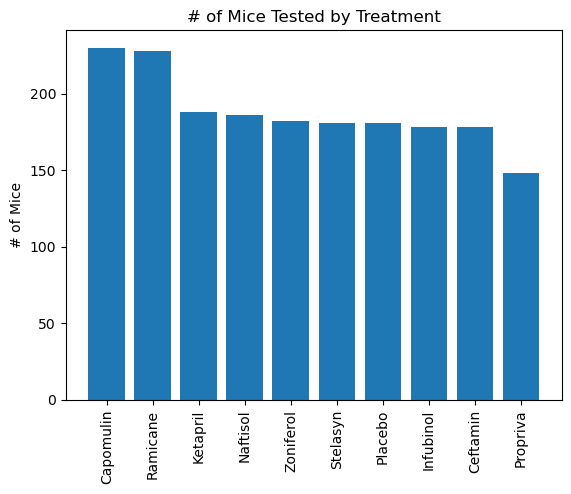

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mouse_time.index.values
y_axis = mouse_time.values
plt.bar(x_axis, y_axis)
plt.xticks(rotation="vertical")
plt.title("# of Mice Tested by Treatment")
plt.ylabel("# of Mice")
plt.show

<Axes: title={'center': 'Female and Male Mice'}, ylabel='Sex'>

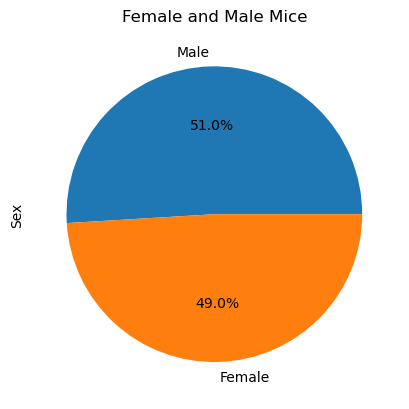

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = new_df["Sex"].value_counts()
plt.title("Female and Male Mice")
gender_data.plot.pie(autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x13d5d6290>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

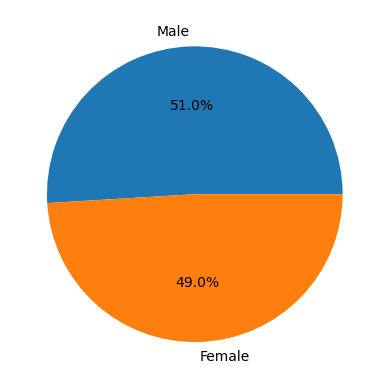

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
plt.pie(gender_data, labels=labels,  autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
capomulin = new_df.loc[new_df["Drug Regimen"] == "Capomulin",:]
ramicane = new_df.loc[new_df["Drug Regimen"] == "Ramicane", :]
infubinol = new_df.loc[new_df["Drug Regimen"] == "Infubinol", :]
ceftamin = new_df.loc[new_df["Drug Regimen"] == "Ceftamin", :]

capomulin_final = capomulin.groupby('Mouse ID').max()['Timepoint']
ramicane_final = ramicane.groupby('Mouse ID').max()['Timepoint']
infubinol_final = infubinol.groupby('Mouse ID').max()['Timepoint']
ceftamin_final = ceftamin.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capomulin_merged = pd.merge(capomulin_final, new_df, on=("Mouse ID","Timepoint"),how="left")
ramicane_merged = pd.merge(ramicane_final, new_df, on=("Mouse ID","Timepoint"),how="left")
infubinol_merged = pd.merge(infubinol_final, new_df, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merged = pd.merge(ceftamin_final, new_df, on=("Mouse ID","Timepoint"),how="left")

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds



Text(0.5, 1.0, 'Final Tumor Volume (mm3) by Treatment')

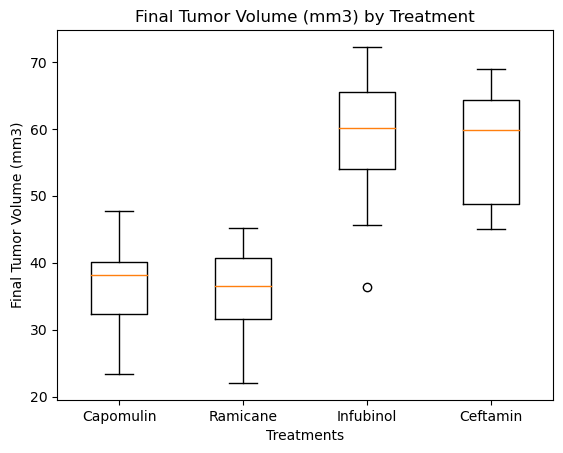

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data = [capomulin_merged['Tumor Volume (mm3)'], ramicane_merged['Tumor Volume (mm3)'],infubinol_merged['Tumor Volume (mm3)'],ceftamin_merged['Tumor Volume (mm3)']]
fig, ax = plt.subplots()
ax.boxplot(data, positions=[1, 2, 3, 4])

ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax.set_xlabel('Treatments')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_title('Final Tumor Volume (mm3) by Treatment')

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

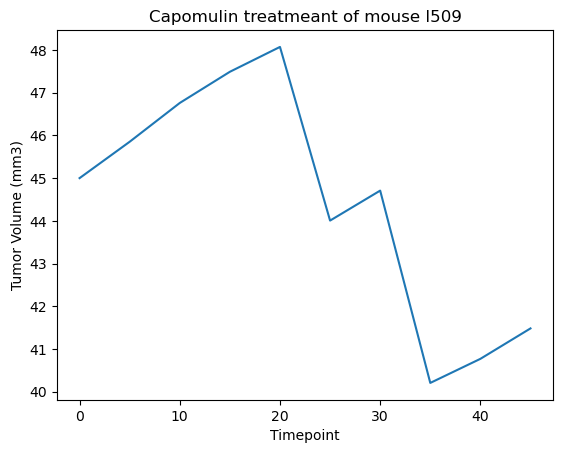

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_capomulin = capomulin.loc[capomulin["Mouse ID"] == "l509",:]
x_axis = single_capomulin["Timepoint"]
y_axis = single_capomulin["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, y_axis)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

/var/folders/tw/8__2vswx70lgnkryscr7wtw00000gn/T/ipykernel_23183/1016406292.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  scatterdata = capomulin.groupby(['Mouse ID']).mean()


Text(0, 0.5, 'Average Tumor Volume (mm3)')

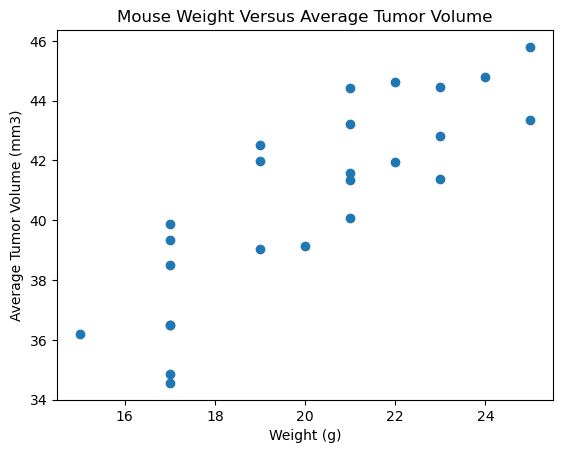

In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
scatterdata = capomulin.groupby(['Mouse ID']).mean()
x_axis = scatterdata['Weight (g)']
y_axis = scatterdata['Tumor Volume (mm3)']

plt.scatter(x_axis,y_axis)
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between both factors is 0.84


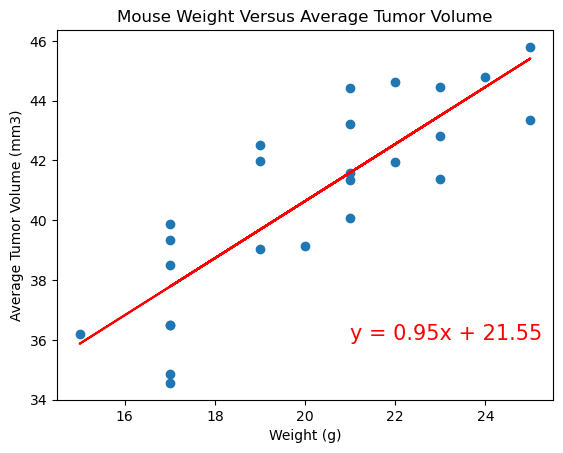

In [34]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_axis = scatterdata['Weight (g)']
y_axis = scatterdata['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(21, 36),fontsize=15,color="red")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")